In [1]:
import numpy as pn
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from src.data.create_data import *
from src.features.create_features import *

In [2]:
train_features, target = load_train_data('../data/external/train.csv')
test_features = load_test_data('../data/external/test.csv')

In [3]:
train_features.head()

,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,...,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NO,Reg,Lvl,AllPub,Inside,...,0,0,NO,NO,NO,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NO,Reg,Lvl,AllPub,FR2,...,0,0,NO,NO,NO,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NO,IR1,Lvl,AllPub,Inside,...,0,0,NO,NO,NO,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NO,IR1,Lvl,AllPub,Corner,...,0,0,NO,NO,NO,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NO,IR1,Lvl,AllPub,FR2,...,0,0,NO,NO,NO,0,12,2008,WD,Normal


In [4]:
test_features.head()

,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,...,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NO,Reg,Lvl,AllPub,Inside,...,120,0,NO,MnPrv,NO,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NO,IR1,Lvl,AllPub,Corner,...,0,0,NO,NO,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NO,IR1,Lvl,AllPub,Inside,...,0,0,NO,MnPrv,NO,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NO,IR1,Lvl,AllPub,Inside,...,0,0,NO,NO,NO,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NO,IR1,HLS,AllPub,Inside,...,144,0,NO,NO,NO,0,1,2010,WD,Normal


In [5]:
train_features.columns

Index(['mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street', 'alley',
       'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope',
       'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle',
       'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd', 'roofstyle',
       'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype', 'masvnrarea',
       'exterqual', 'extercond', 'foundation', 'bsmtqual', 'bsmtcond',
       'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1', 'bsmtfintype2',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating', 'heatingqc',
       'centralair', 'electrical', '1stflrsf', '2ndflrsf', 'lowqualfinsf',
       'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath',
       'bedroomabvgr', 'kitchenabvgr', 'kitchenqual', 'totrmsabvgrd',
       'functional', 'fireplaces', 'fireplacequ', 'garagetype', 'garageyrblt',
       'garagefinish', 'garagecars', 'garagearea', 'garagequal', 'garagecond',
       'paveddrive', 'wo

In [6]:
ordinal_feat = ['exterqual', 'extercond', 'bsmtqual', 'bsmtcond',
                'bsmtexposure', 'heatingqc', 'kitchenqual', 'fireplacequ',
                'housestyle', 'garagequal', 'garagecond', 'poolqc']

nominal_feat = ['salecondition', 'saletype', 'fence', 'miscfeature',
                'garagetype', 'garagefinish', 'functional', 'electrical',
                'heating', 'foundation', 'roofstyle', 'roofmatl',
                'exterior1st', 'exterior2nd', 'masvnrtype',
                'street', 'alley', 'lotshape', 'landcontour',
                'bsmtfintype1', 'bsmtfintype2',
                'utilities', 'lotconfig', 'landslope', 'neighborhood',
                'condition1', 'condition2', 'bldgtype', 'mszoning']

In [7]:
ordinal_mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': -1,
                   'NO': -1, 'No': -1, 'Av': 3, 'Mn': 2,
                   '1Story': 10, '1.5Fin': 15, '1.5Unf': 12,
                   '2Story': 20, '2.5Fin': 25, '2.5Unf': 22,
                   'SFoyer': 21, 'SLvl': 23}

train_features[ordinal_feat].apply(lambda x: x.map(ordinal_mapping))

,exterqual,extercond,bsmtqual,bsmtcond,bsmtexposure,heatingqc,kitchenqual,fireplacequ,housestyle,garagequal,garagecond,poolqc
Id,,,,,,,,,,,,
1,4,3,4,3,-1,5,4,-1,20,3,3,-1
2,3,3,4,3,4,5,3,3,10,3,3,-1
3,4,3,4,3,2,5,4,3,20,3,3,-1
4,3,3,3,4,-1,4,4,4,20,3,3,-1
5,4,3,4,3,3,5,4,3,20,3,3,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
1456,3,3,4,3,-1,5,3,3,20,3,3,-1
1457,3,3,4,3,-1,3,3,3,10,3,3,-1
1458,5,4,3,4,-1,5,4,4,20,3,3,-1


In [37]:
f = lambda x: int(''.join(x.astype(str)))
mapper = pd.get_dummies(train_features[nominal_feat[0]]).apply(f, axis=1)
pd.concat([train_features[nominal_feat[0]], mapper],
          axis=1).groupby(nominal_feat[0])[0].median().to_dict()

{'Abnorml': 100000.0,
 'AdjLand': 10000.0,
 'Alloca': 1000.0,
 'Family': 100.0,
 'Normal': 10.0,
 'Partial': 1.0}

In [50]:
f = lambda x: x.count()
mapper = train_features.groupby(nominal_feat[0])[nominal_feat[0]].apply(f).to_dict()
mapper

{'Abnorml': 101,
 'AdjLand': 4,
 'Alloca': 12,
 'Family': 20,
 'Normal': 1198,
 'Partial': 125}

In [51]:
for col in nominal_feat:
    mapper = train_features.groupby(col)[col].apply(f).to_dict()
    train_features[col] = train_features[col].map(mapper)

train_features

,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,...,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,1151,65.0,8450,1454,1369,925,1311,1459,1052,...,0,0,NO,1179,1406,0,2,2008,1267,1198
2,20,1151,80.0,9600,1454,1369,925,1311,1459,47,...,0,0,NO,1179,1406,0,5,2007,1267,1198
3,60,1151,68.0,11250,1454,1369,484,1311,1459,1052,...,0,0,NO,1179,1406,0,9,2008,1267,1198
4,70,1151,60.0,9550,1454,1369,484,1311,1459,263,...,0,0,NO,1179,1406,0,2,2006,1267,101
5,60,1151,84.0,14260,1454,1369,484,1311,1459,47,...,0,0,NO,1179,1406,0,12,2008,1267,1198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,1151,62.0,7917,1454,1369,925,1311,1459,1052,...,0,0,NO,1179,1406,0,8,2007,1267,1198
1457,20,1151,85.0,13175,1454,1369,925,1311,1459,1052,...,0,0,NO,157,1406,0,2,2010,1267,1198
1458,70,1151,66.0,9042,1454,1369,925,1311,1459,1052,...,0,0,NO,59,49,2500,5,2010,1267,1198


In [53]:
train_features[nominal_feat].apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))

,salecondition,saletype,fence,miscfeature,garagetype,garagefinish,functional,electrical,heating,foundation,...,bsmtfintype1,bsmtfintype2,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,mszoning
Id,,,,,,,,,,,,,,,,,,,,,
1,1.00000,1.0,1.000000,1.000000,1.000000,0.650763,1.000000,1.000000,1.0,1.000000,...,0.969466,1.000000,1.0,1.000000,1.0,0.663677,1.000000,1.0,1.0,1.0
2,1.00000,1.0,1.000000,1.000000,1.000000,0.650763,1.000000,1.000000,1.0,0.979814,...,0.465649,1.000000,1.0,0.041031,1.0,0.040359,0.062798,1.0,1.0,1.0
3,1.00000,1.0,1.000000,1.000000,1.000000,0.650763,1.000000,1.000000,1.0,1.000000,...,0.969466,1.000000,1.0,1.000000,1.0,0.663677,1.000000,1.0,1.0,1.0
4,0.08124,1.0,1.000000,1.000000,0.440972,1.000000,1.000000,1.000000,1.0,0.222050,...,0.465649,1.000000,1.0,0.247137,1.0,0.219731,1.000000,1.0,1.0,1.0
5,1.00000,1.0,1.000000,1.000000,1.000000,0.650763,1.000000,1.000000,1.0,1.000000,...,0.969466,1.000000,1.0,0.041031,1.0,0.174888,1.000000,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,1.00000,1.0,1.000000,1.000000,1.000000,0.650763,1.000000,1.000000,1.0,1.000000,...,1.000000,1.000000,1.0,1.000000,1.0,0.345291,1.000000,1.0,1.0,1.0
1457,1.00000,1.0,0.125000,1.000000,1.000000,1.000000,0.022075,1.000000,1.0,0.979814,...,0.465649,0.032206,1.0,1.000000,1.0,0.318386,1.000000,1.0,1.0,1.0
1458,1.00000,1.0,0.041096,0.034164,1.000000,0.650763,1.000000,1.000000,1.0,0.004658,...,0.969466,1.000000,1.0,1.000000,1.0,0.219731,1.000000,1.0,1.0,1.0


In [5]:
encode_ordinal_features(train_features)
train_features

,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,...,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NO,Reg,Lvl,AllPub,Inside,...,0,0,-1,NO,NO,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NO,Reg,Lvl,AllPub,FR2,...,0,0,-1,NO,NO,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NO,IR1,Lvl,AllPub,Inside,...,0,0,-1,NO,NO,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NO,IR1,Lvl,AllPub,Corner,...,0,0,-1,NO,NO,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NO,IR1,Lvl,AllPub,FR2,...,0,0,-1,NO,NO,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NO,Reg,Lvl,AllPub,Inside,...,0,0,-1,NO,NO,0,8,2007,WD,Normal
1457,20,RL,85.0,13175,Pave,NO,Reg,Lvl,AllPub,Inside,...,0,0,-1,MnPrv,NO,0,2,2010,WD,Normal
1458,70,RL,66.0,9042,Pave,NO,Reg,Lvl,AllPub,Inside,...,0,0,-1,GdPrv,Shed,2500,5,2010,WD,Normal


In [6]:
freq_encode_nominal_features(train_features)
train_features

,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,...,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,1151,65.0,8450,1454,1369,925,1311,1459,1052,...,0,0,-1,1179,1406,0,2,2008,1267,1198
2,20,1151,80.0,9600,1454,1369,925,1311,1459,47,...,0,0,-1,1179,1406,0,5,2007,1267,1198
3,60,1151,68.0,11250,1454,1369,484,1311,1459,1052,...,0,0,-1,1179,1406,0,9,2008,1267,1198
4,70,1151,60.0,9550,1454,1369,484,1311,1459,263,...,0,0,-1,1179,1406,0,2,2006,1267,101
5,60,1151,84.0,14260,1454,1369,484,1311,1459,47,...,0,0,-1,1179,1406,0,12,2008,1267,1198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,1151,62.0,7917,1454,1369,925,1311,1459,1052,...,0,0,-1,1179,1406,0,8,2007,1267,1198
1457,20,1151,85.0,13175,1454,1369,925,1311,1459,1052,...,0,0,-1,157,1406,0,2,2010,1267,1198
1458,70,1151,66.0,9042,1454,1369,925,1311,1459,1052,...,0,0,-1,59,49,2500,5,2010,1267,1198


In [7]:
train_features.isna().sum()

mssubclass       0
mszoning         0
lotfrontage      0
lotarea          0
street           0
                ..
miscval          0
mosold           0
yrsold           0
saletype         0
salecondition    0
Length: 79, dtype: int64

In [8]:
encode_ordinal_features(test_features)
freq_encode_nominal_features(test_features)
test_features

,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,...,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,10,80.0,11622,1453,1352,934,1311,1457,1081,...,120,0,-1,172,1408,0,6,2010,1258,1204
1462,20,1114,81.0,14267,1453,1352,484,1311,1457,248,...,0,0,-1,1169,3,12500,6,2010,1258,1204
1463,60,1114,74.0,13830,1453,1352,484,1311,1457,1081,...,0,0,-1,172,1408,0,3,2010,1258,1204
1464,60,1114,78.0,9978,1453,1352,484,1311,1457,1081,...,0,0,-1,1169,1408,0,6,2010,1258,1204
1465,120,1114,43.0,5005,1453,1352,484,70,1457,1081,...,144,0,-1,1169,1408,0,1,2010,1258,1204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,242,21.0,1936,1453,1352,934,1311,1457,1081,...,0,0,-1,1169,1408,0,6,2006,1258,1204
2916,160,242,21.0,1894,1453,1352,934,1311,1457,1081,...,0,0,-1,1169,1408,0,4,2006,1258,89
2917,20,1114,160.0,20000,1453,1352,934,1311,1457,1081,...,0,0,-1,1169,1408,0,9,2006,1258,89


In [9]:
test_features.isna().sum()

mssubclass       0
mszoning         0
lotfrontage      0
lotarea          0
street           0
                ..
miscval          0
mosold           0
yrsold           0
saletype         0
salecondition    0
Length: 79, dtype: int64

## creating features

- age of the property
- modification duration
- how old when modify
- selling quarter
- total finished basement area
- total bathrooms at basement
- total bathroom above grade

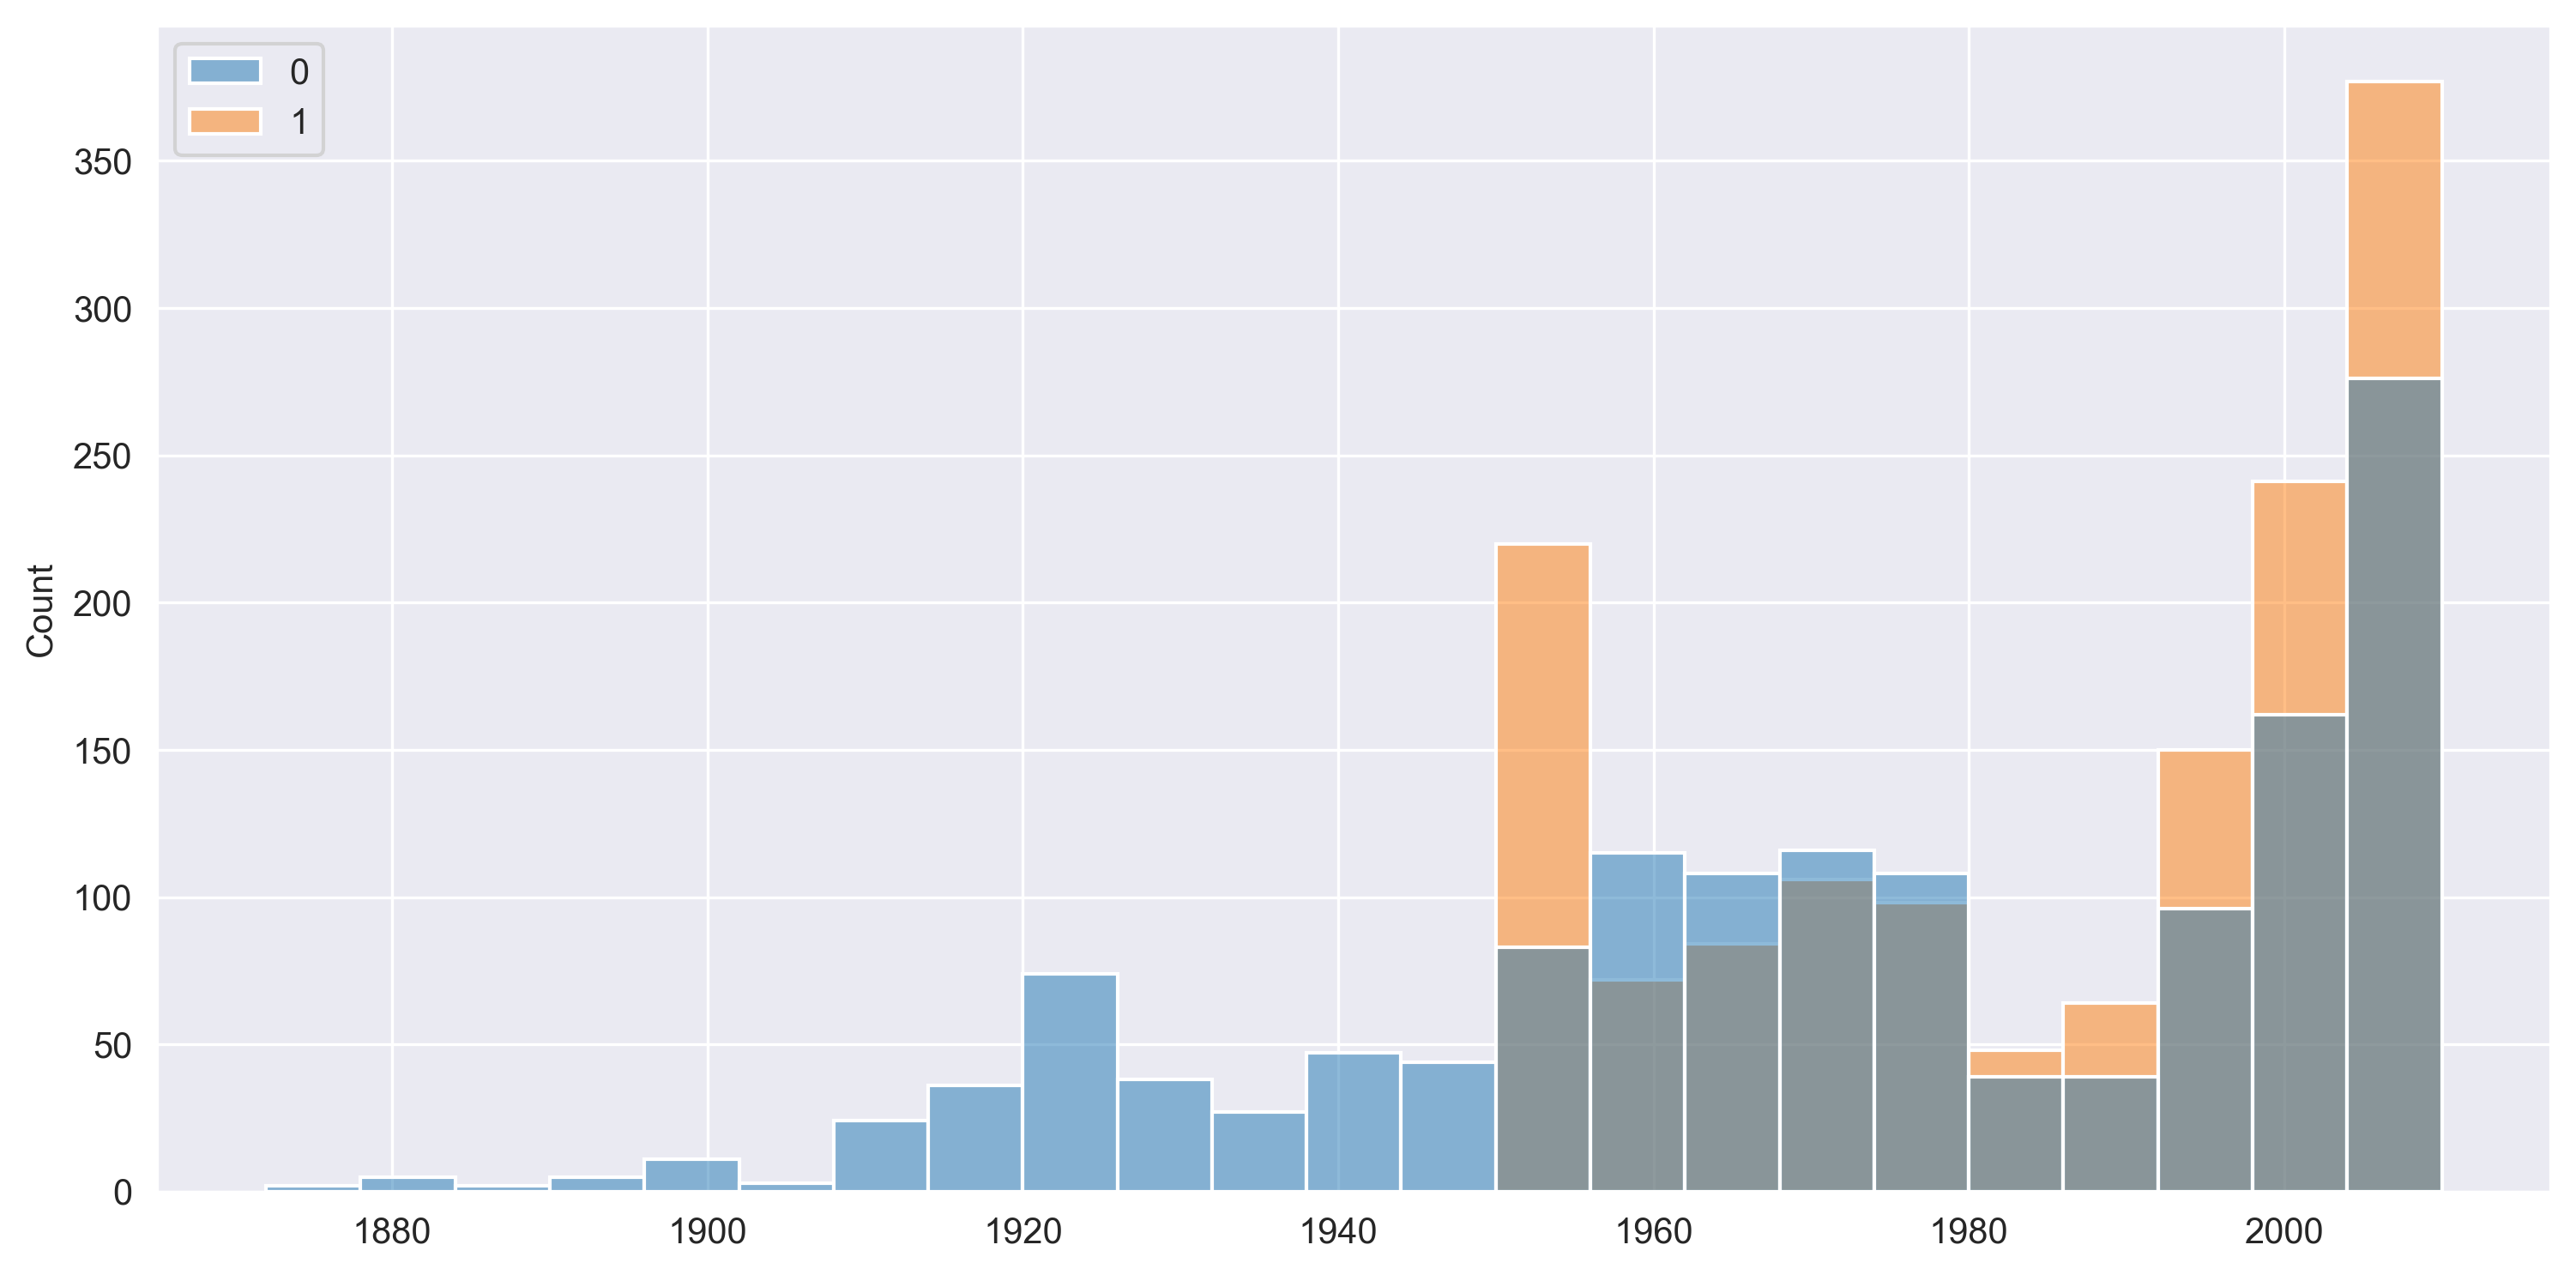

In [20]:
plt.figure(figsize=[12, 6], dpi=300)
sns.histplot([train_features['yearbuilt'].tolist(),
              train_features['yearremodadd'].tolist()])
plt.show()

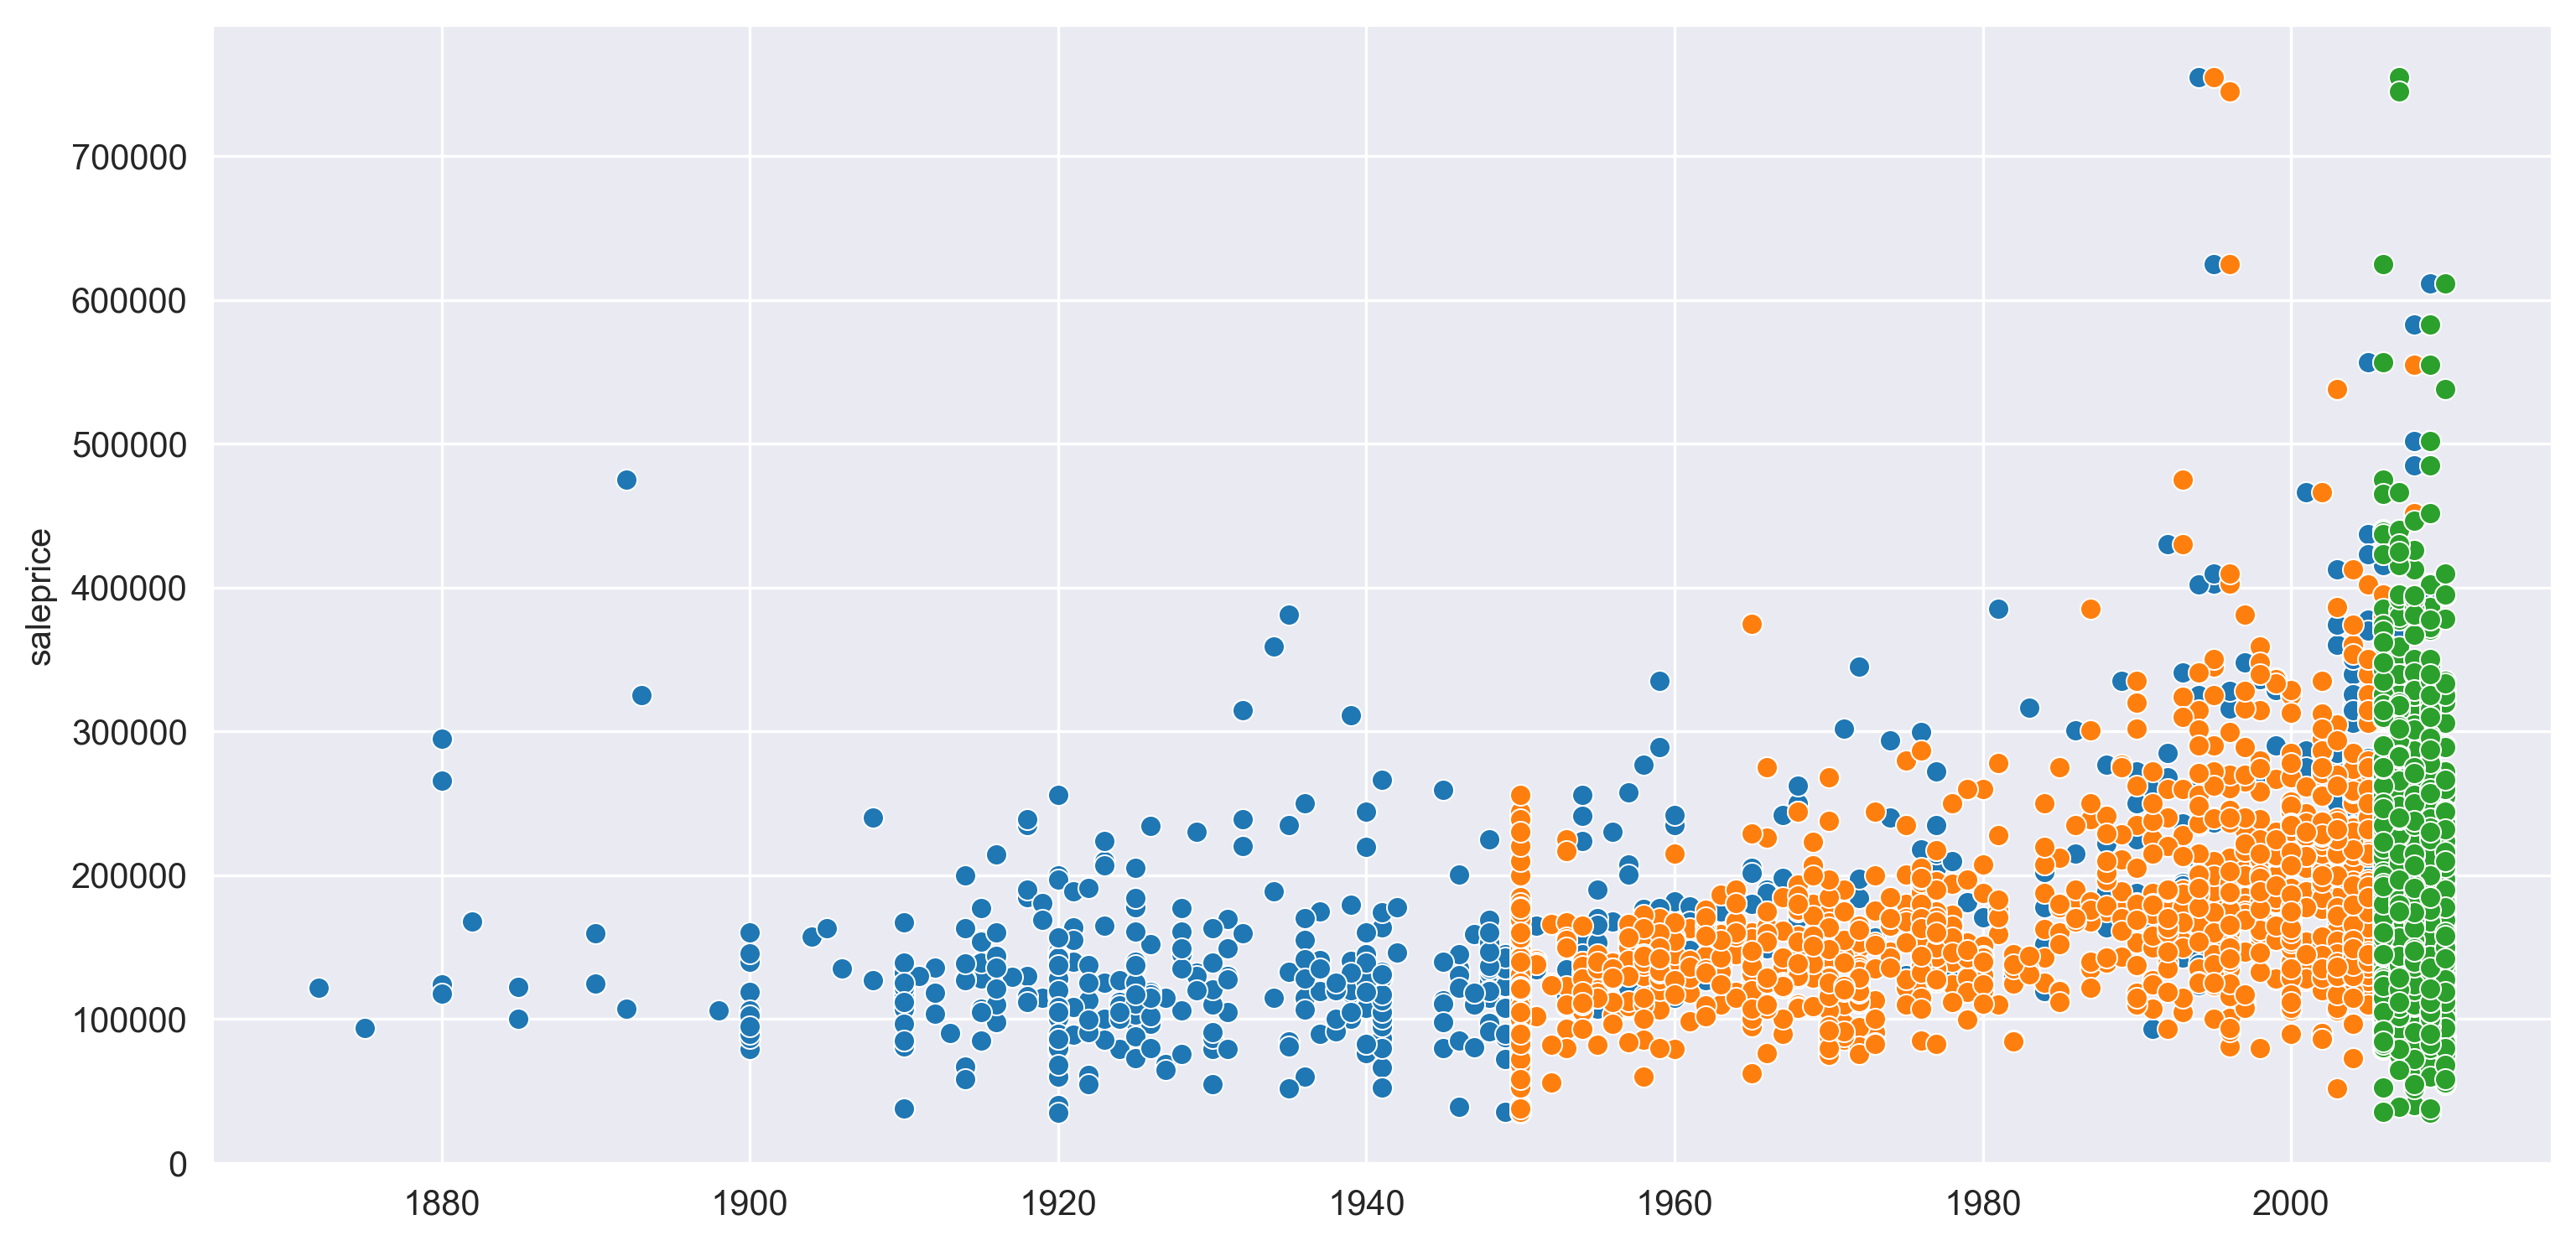

In [25]:
plt.figure(figsize=[12, 6], dpi=300)
sns.scatterplot(x=train_features['yearbuilt'], y=target)
sns.scatterplot(x=train_features['yearremodadd'], y=target)
sns.scatterplot(x=train_features['yrsold'], y=target)
plt.show()

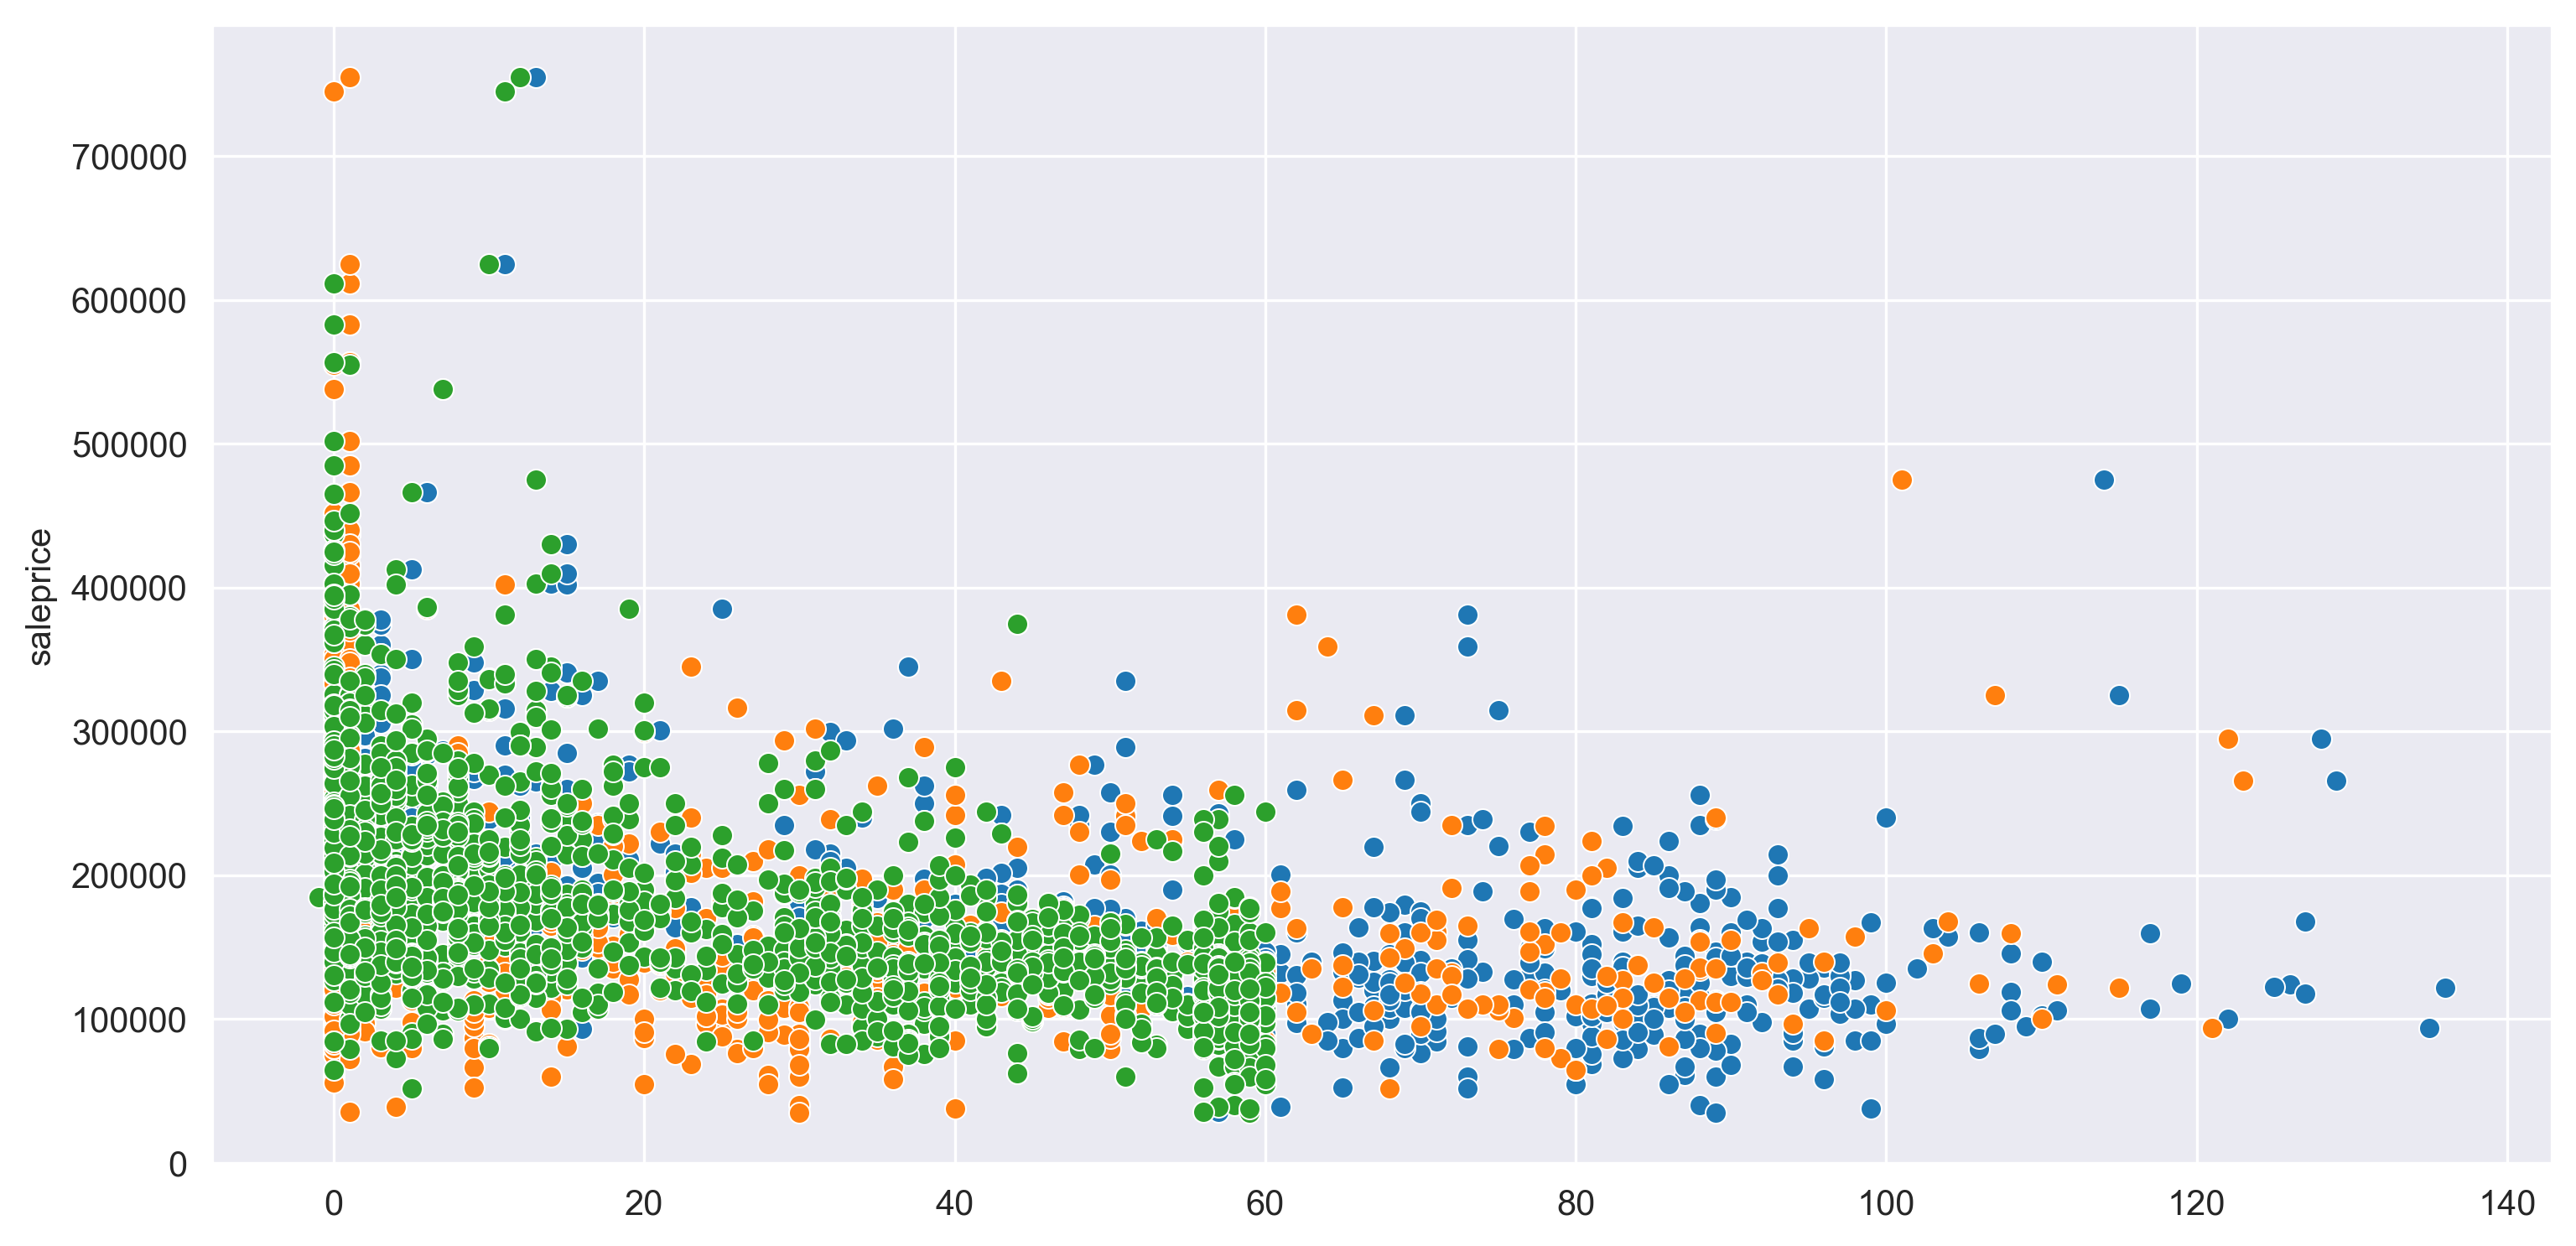

In [27]:
plt.figure(figsize=[12, 6], dpi=300)
sns.scatterplot(x=train_features['yrsold'] - train_features['yearbuilt'], y=target)
sns.scatterplot(x=train_features['yearremodadd'] - train_features['yearbuilt'], y=target)
sns.scatterplot(x=train_features['yrsold'] - train_features['yearremodadd'], y=target)
plt.show()

In [30]:
def quarter(x):
    if x <= 4:
        return 1
    elif 4 < x <= 8:
        return 2
    elif x > 8:
        return 3


train_features['mosold'].apply(quarter)

Id
1       1
2       2
3       3
4       1
5       3
       ..
1456    2
1457    1
1458    2
1459    1
1460    2
Name: mosold, Length: 1460, dtype: int64

In [10]:
derived_features(train_features)

In [11]:
train_features

,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,...,yrsold,saletype,salecondition,propage,modage,timetomod,quarter,totfhbsmntarea,totbathbsmnt,totbathbsabv
Id,,,,,,,,,,,,,,,,,,,,,
1,60,1151,65.0,8450,1454,1369,925,1311,1459,1052,...,2008,1267,1198,5,5,0,1,706,1,3
2,20,1151,80.0,9600,1454,1369,925,1311,1459,47,...,2007,1267,1198,31,31,0,2,978,1,2
3,60,1151,68.0,11250,1454,1369,484,1311,1459,1052,...,2008,1267,1198,7,6,1,3,486,1,3
4,70,1151,60.0,9550,1454,1369,484,1311,1459,263,...,2006,1267,101,91,36,55,1,216,1,1
5,60,1151,84.0,14260,1454,1369,484,1311,1459,47,...,2008,1267,1198,8,8,0,3,655,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,1151,62.0,7917,1454,1369,925,1311,1459,1052,...,2007,1267,1198,8,7,1,2,0,0,3
1457,20,1151,85.0,13175,1454,1369,925,1311,1459,1052,...,2010,1267,1198,32,22,10,1,953,1,2
1458,70,1151,66.0,9042,1454,1369,925,1311,1459,1052,...,2010,1267,1198,69,4,65,2,275,0,2
